# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [3]:
def sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples):
    
    # Sample classes ck
    classes = np.array([0,1,2])
    ck_samples = np.random.choice(classes, size=n_samples, p=pi_vector)
    
    # Sample x given the classes
    x_samples = list()
    for ck in ck_samples:
          x_samples.append(multivariate_normal.rvs(mean_vector[ck], covariance_vector[ck], size=1))
          
    return np.array(x_samples), ck_samples
    

### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


In [140]:
pi_vector = np.array([0.3, 0.4, 0.3])
mean_vector = np.array([np.array([0, 0]), np.array([3, 0]),np.array([0, 3])])
covariance_vector = np.array([np.eye(2) for _ in range(3)])
n_samples = 1000

X, c = sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples)

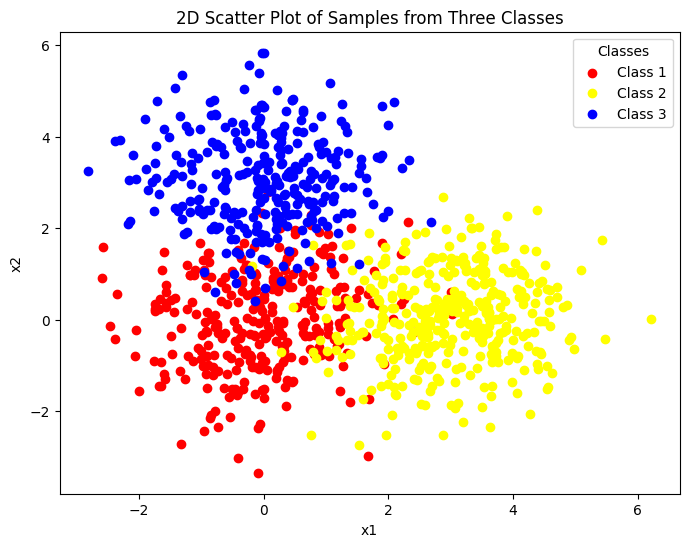

In [141]:

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


In [ ]:
# def decision_boundary_class_1_2(mean_1, mean_2, pi_1, pi_2):
#     x1 = np.linspace(0, 2, 1000000)
#     x2 = np.linspace(-2, 4)
#     tolerance = 1e-5
    
#     x1_expanded = 2 * x1[:, None] * (mean_2[0] - mean_1[0]) 
#     x2_expanded = 2 * x2[None, :] * (mean_2[1] - mean_1[1])
#     result = x1_expanded + x2_expanded  
#     # f = 2*x1*(mean_2[0] - mean_1[0]) + 2*x2*(mean_2[1] - mean_1[1])
#     # constant = np.array([np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) for _ in range(len(f))])
    
#     # indexes = np.where(f == constant)[0]
#     constant = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1 / pi_2)
#     # print(constant)
#     # print(x1)
#     matches = np.where(np.abs(result - constant) < tolerance) 
#     return x1[matches[0]], x2[matches[1]]

In [275]:
def sample_x(k, mean_vector, covariance_vector, n_samples):
    return multivariate_normal.rvs(mean_vector[k-1], covariance_vector[k-1], size=n_samples)

In [ ]:
# def decision_boundary(samples, mean_1, mean_2, cov_1, cov_2, pi_1, pi_2):
#     tolerance = 1e-8
#     equal_x1 = np.ones(len(samples)) * np.finfo(np.float32).max
#     equal_x2 = np.ones(len(samples)) * np.finfo(np.float32).max
#     for i in range(len(samples)):
#         x1 = samples[i][0]
#         for j in range(len(samples)):
#             x2 = samples[j][1]
#             point = np.array([x1, x2])
#             pdf_1 = pi_1 * multivariate_normal.pdf(point, mean=mean_1, cov=cov_1)
#             pdf_2 = pi_2 * multivariate_normal.pdf(point, mean=mean_2, cov=cov_2)
#             if(np.abs(pdf_1 - pdf_2) < tolerance):
#                 #print(f"{pdf_1}, {pdf_2}")
#                 equal_x1[i] = point[0]
#                 equal_x2[j] = point[1]
    
#     idxs_1 = np.where(equal_x1 != np.finfo(np.float32).max)[0]
#     idxs_2 = np.where(equal_x2 != np.finfo(np.float32).max)[0]
#     return x1[idxs_1], x2[idxs_2]
            

    

In [302]:
def decision_boundary(mean_1, mean_2, pi_1, pi_2):
    
    q = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1/pi_2)
    a = mean_2[0] - mean_1[0]
    b = mean_2[1] - mean_1[1]
    if a == 0:
        x2 = np.ones(100) * q / (2*b)
        x1 = np.linspace(-3, 7, 100)
        return x1, x2
    if b == 0:
        x1 = np.ones(100) * q / (2*a)
        x2 = np.linspace(-3, 7, 100)
        return x1, x2
    print(a, b, q)
    x1 = np.linspace(-3, 7)
    x2 = ((q/2) - a*x1) / b
    return x1, x2
    
   

-3 3 0.575364144903562


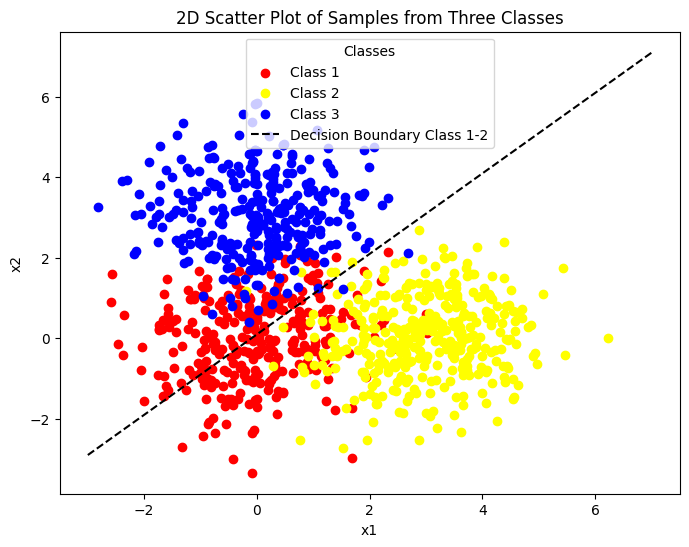

In [303]:
samples_c1 = sample_x(1, mean_vector, covariance_vector, 100)
samples_c2 = sample_x(2, mean_vector, covariance_vector, 100)
samples_c3 = sample_x(3, mean_vector, covariance_vector, 100)

x1, x2 = decision_boundary( mean_vector[1], mean_vector[2], pi_vector[1], pi_vector[2])
plt.figure(figsize=(8, 6))
boundary = 1.595
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
# plt.axvline(x=boundary, linestyle='--', color='black', label='Decision Boundary Class 1-2')
plt.plot(x1, x2, linestyle='--', color='black', label='Decision Boundary Class 1-2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

In [290]:
E = 2*np.eye(2)
np.linalg.inv(E)

array([[0.5, 0. ],
       [0. , 0.5]])

### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$


### **Q9** What is the decision boundary between class 1 and class 2 in this case?


### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

### **Q12** Compute the error of the Bayes classifier on this dataset.